In [659]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn_pandas import gen_features
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report , confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier


In [634]:
df = pd.read_csv("chocolate_bars.csv")

In [635]:
df.head(10)

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
5,2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80.0,3.0,"B,S,C","mildly bitter, basic cocoa, fatty",3.25
6,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68.0,3.0,"B,S,C","milk brownie, macadamia,chewy",3.50
7,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,4.0,"B,S,C,L","vegetal, nutty",3.50
8,797,A. Morin,France,2012,Peru,Peru,63.0,4.0,"B,S,C,L","fruity, melon, roasty",3.75
9,1011,A. Morin,France,2013,Panama,Panama,70.0,4.0,"B,S,C,L","brief fruit note, earthy, nutty",2.75


In [636]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.6+ KB


In [637]:
df.describe()

,id,year_reviewed,cocoa_percent,num_ingredients,rating
count,2530.000000,2530.000000,2530.000000,2443.000000,2530.000000
mean,1429.800791,2014.374308,71.639723,3.041343,3.196344
std,757.648556,3.968267,5.616724,0.913728,0.445321
min,5.000000,2006.000000,42.000000,1.000000,1.000000
25%,802.000000,2012.000000,70.000000,2.000000,3.000000
50%,1454.000000,2015.000000,70.000000,3.000000,3.250000
75%,2079.000000,2018.000000,74.000000,4.000000,3.500000
max,2712.000000,2021.000000,100.000000,6.000000,4.000000


In [638]:
df.isna().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

In [639]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Унікальні значення для стовбця "{column}": {unique_values}')

Унікальні значення для стовбця "id": [2454 2458 2542 2546  797 1011 1015 1019 1315 1319 1676 1680 1704 1876
 2206 2648 1462 1470 2462 2470  705 2438 2442  370  316  502  508  636
 1061 1173 1215 1992 1944 1125 1133 1129 1732 1728 2044  147  129  175
  304  363  544  470  725  327  464  322 1964 1145 1494 1498   75  123
  170  979 2088 2092 2434  572 1065 1259 1852 2586 1379 1375 1602 1534
 1598 1904 1928 1724 1900 1908 1924 2020 2028 2024 2068 2254 2450 2330
 2166 2162  300  355  486  600  531  745  729  947 1193 1181 2562 2566
  141  331  647  661 1780 2056 2672  999  995 1474 2146 1454 2290 2294
  983 1295 1554 1980  955 1880 1840 1868 2374 1948 1784 1788  586 1804
 1800 1864 2190 1768 2246  773  757 1141 1482 1486 2084  233  256  414
  423  431  558  565  478  963 2108 2114 2422 2574 1331 2590 1046  911
 1752 1756 1740 1996   81   24   32   48  199  336  395  761  629  672
 1042 1038 1418 1339 1912 2250 2554  341 1267 1271 2194 2096 1255 1355
 1984 1518 1514 1149 1235 1231 1638 2052

B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, Sa (Salt)

In [640]:
Ingredients = {
    "Beans": "B",
    "Sugar": "S",
    "Sweetener": "S*",
    "Cocoa Butter": "C",
    "Vanilla": "V",
    "Lecithin": "L",
    "Salt": "Sa"
}

for key in Ingredients:
    df[key] = np.where(df['ingredients'].str.contains(Ingredients[key],case=True), 1, 0)

df.head() 

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,Beans,Sugar,Sweetener,Cocoa Butter,Vanilla,Lecithin,Salt
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25,1,1,1,1,0,0,0
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50,1,1,1,1,0,0,0
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75,1,1,1,1,0,0,0
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00,1,1,1,1,0,0,0
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00,1,1,1,1,0,0,0


In [641]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Унікальні значення для стовбця "{column}": {unique_values}')

Унікальні значення для стовбця "id": [2454 2458 2542 2546  797 1011 1015 1019 1315 1319 1676 1680 1704 1876
 2206 2648 1462 1470 2462 2470  705 2438 2442  370  316  502  508  636
 1061 1173 1215 1992 1944 1125 1133 1129 1732 1728 2044  147  129  175
  304  363  544  470  725  327  464  322 1964 1145 1494 1498   75  123
  170  979 2088 2092 2434  572 1065 1259 1852 2586 1379 1375 1602 1534
 1598 1904 1928 1724 1900 1908 1924 2020 2028 2024 2068 2254 2450 2330
 2166 2162  300  355  486  600  531  745  729  947 1193 1181 2562 2566
  141  331  647  661 1780 2056 2672  999  995 1474 2146 1454 2290 2294
  983 1295 1554 1980  955 1880 1840 1868 2374 1948 1784 1788  586 1804
 1800 1864 2190 1768 2246  773  757 1141 1482 1486 2084  233  256  414
  423  431  558  565  478  963 2108 2114 2422 2574 1331 2590 1046  911
 1752 1756 1740 1996   81   24   32   48  199  336  395  761  629  672
 1042 1038 1418 1339 1912 2250 2554  341 1267 1271 2194 2096 1255 1355
 1984 1518 1514 1149 1235 1231 1638 2052

In [642]:
df.isna().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
Beans                0
Sugar                0
Sweetener            0
Cocoa Butter         0
Vanilla              0
Lecithin             0
Salt                 0
dtype: int64

In [643]:
asia = ['Vietnam', 'Indonesia', 'Sri Lanka', 'Malaysia', 'Philippines', 'India', 'Taiwan', 'Thailand', 'Sumatra', 'Sulawesi']
africa = ['Tanzania', 'Madagascar', 'Fiji', 'Uganda', 'Burma', 'Ghana', 'Nigeria', 'Liberia', 'Sierra Leone', 'Ivory Coast', 'Gabon', 'Sao Tome', 'Sao Tome & Principe', 'Cameroon', 'Sao Tome & Principe', 'DR Congo']
america = ['Dominican Republic', 'Venezuela', 'Peru', 'Bolivia', 'Panama', 'Colombia', 'Brazil', 'Ecuador', 'Cuba', 'Mexico', 'Nicaragua', 'Belize', 'Jamaica', 'Grenada', 'Guatemala', 'Honduras', 'Costa Rica', 'Haiti', 'Puerto Rico', 'Martinique', 'St. Lucia', 'St.Vincent-Grenadines', 'El Salvador', 'Suriname', 'DR Congo']
oceania = ['Vanuatu', 'Papua New Guinea', 'Solomon Islands', 'Samoa', 'Australia']

In [644]:
df['asia'] = df['bean_origin'].apply(lambda x: 1 if x in asia else 0)
df['africa'] =  df['bean_origin'].apply(lambda x: 1 if x in africa else 0)
df['america'] =  df['bean_origin'].apply(lambda x: 1 if x in america else 0)
df['oceania'] =  df['bean_origin'].apply(lambda x: 1 if x in oceania else 0)

df['dark_choc'] = df['cocoa_percent'].apply(lambda x: 1 if x > 60 else 0)
df['milk_choc'] = df['cocoa_percent'].apply(lambda x: 1 if x <= 60 else 0)

In [645]:
df['rating'].value_counts()


rating
3.50    565
3.00    523
3.25    464
2.75    333
3.75    300
2.50    166
4.00    112
2.00     33
2.25     17
1.50     10
1.00      4
1.75      3
Name: count, dtype: int64

In [646]:
df['rating_category'] = pd.cut(df['rating'], [1.9, 2.9, 3.49, 3.9, 5.0], labels=False)
df['rating_category'] = df['rating_category'].fillna(0)

# 1 - low
# 2 - med
# 3 - high

# мій спосіб
"""
df['rating_category'] = np.select(
    [df['rating'].between(1, 2.50), df['rating'].between(2.75, 3.25), df['rating'].between(3.5, 4)],
    ['1', '2', '3'],
    default='Unknown'
)
"""

"\ndf['rating_category'] = np.select(\n    [df['rating'].between(1, 2.50), df['rating'].between(2.75, 3.25), df['rating'].between(3.5, 4)],\n    ['1', '2', '3'],\n    default='Unknown'\n)\n"

In [647]:
df.isna().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
Beans                0
Sugar                0
Sweetener            0
Cocoa Butter         0
Vanilla              0
Lecithin             0
Salt                 0
asia                 0
africa               0
america              0
oceania              0
dark_choc            0
milk_choc            0
rating_category      0
dtype: int64

In [648]:
df['rating_category'].value_counts()


rating_category
1.0    987
2.0    865
0.0    566
3.0    112
Name: count, dtype: int64

In [649]:
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,...,Vanilla,Lecithin,Salt,asia,africa,america,oceania,dark_choc,milk_choc,rating_category
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",...,0,0,0,0,1,0,0,1,0,1.0
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",...,0,0,0,0,0,1,0,1,0,2.0
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",...,0,0,0,0,1,0,0,1,0,2.0
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",...,0,0,0,0,1,0,0,1,0,1.0
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",...,0,0,0,0,0,1,0,1,0,1.0


In [650]:
X = df.drop(['rating','rating_category', 'manufacturer', 'id', 'bar_name', 'company_location', 'ingredients', 'bean_origin', 'review', 'year_reviewed'], axis=1)
y = df['rating_category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = gen_features(
    columns=[[col] for col in df.drop(['rating','rating_category', 'manufacturer', 'id', 'bar_name', 'company_location', 'ingredients', 'bean_origin', 'review', 'year_reviewed'], axis=1)[['cocoa_percent','num_ingredients']].columns],
    classes=[
        {'class': SimpleImputer, 'strategy': 'most_frequent'},
        {'class': StandardScaler}
    ]
)
categorical_features = gen_features(
    columns=[[col] for col in df.drop(['rating','rating_category', 'manufacturer', 'id', 'bar_name', 'company_location', 'ingredients', 'bean_origin', 'review', 'year_reviewed'], axis=1).columns if col not in ['cocoa_percent', 'num_ingredients']]
)

mapper = DataFrameMapper(
  numerical_features + categorical_features, df_out= True, default=False)

X_train_prepr = mapper.fit_transform(X_train)
X_test_prepr = mapper.transform(X_test)

In [651]:
X_train_prepr

,cocoa_percent,num_ingredients,Beans,Sugar,Sweetener,Cocoa Butter,Vanilla,Lecithin,Salt,asia,africa,america,oceania,dark_choc,milk_choc
1990,-0.305484,-1.150873,1,1,1,0,0,0,0,0,0,0,0,1,0
157,0.051399,-0.031523,1,1,1,1,0,0,0,0,0,0,0,1,0
1472,-0.305484,-1.150873,1,1,1,0,0,0,0,0,0,1,0,1,0
790,0.943607,-0.031523,1,1,1,1,0,0,0,0,1,0,0,1,0
2075,-0.305484,-0.031523,1,1,1,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,-0.305484,-1.150873,1,1,1,0,0,0,0,0,0,1,0,1,0
1095,3.441788,2.207177,1,1,1,1,1,1,0,0,0,0,0,1,0
1130,-1.376133,-0.031523,1,1,1,0,0,1,0,0,0,1,0,1,0
1294,0.051399,-1.150873,1,1,1,0,0,0,0,0,0,1,0,1,0


In [652]:
y_train

1990    1.0
157     2.0
1472    2.0
790     0.0
2075    1.0
       ... 
1638    1.0
1095    1.0
1130    0.0
1294    0.0
860     1.0
Name: rating_category, Length: 2024, dtype: float64

# SGDClassifier

In [653]:
sgd = SGDClassifier()

params = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'modified_huber']
}

grid_search_sgd = GridSearchCV(sgd, params, cv=5)
grid_search_sgd.fit(X_train_prepr, y_train)

print("Найкращі параметри:", grid_search_sgd.best_params_)

Найкращі параметри: {'alpha': 0.01, 'loss': 'modified_huber', 'penalty': 'l1'}


In [654]:
y_pred_sgd = grid_search_sgd.predict(X_test_prepr)

# Обчислення метрик
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd, average='weighted', zero_division=0)
recall_sgd = recall_score(y_test, y_pred_sgd, average='weighted', zero_division=0)
f1_sgd = f1_score(y_test, y_pred_sgd, average='weighted', zero_division=0)

print("Accuracy:", accuracy_sgd)
print("Precision:", precision_sgd)
print("Recall:", recall_sgd)
print("F1 Score:", f1_sgd)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_sgd))


Accuracy: 0.383399209486166
Precision: 0.3649397093969354
Recall: 0.383399209486166
F1 Score: 0.26456312080659605
Classification Report:
              precision    recall  f1-score   support

         0.0       0.54      0.11      0.19       131
         1.0       0.38      0.92      0.54       190
         2.0       0.27      0.03      0.05       160
         3.0       0.00      0.00      0.00        25

    accuracy                           0.38       506
   macro avg       0.30      0.27      0.19       506
weighted avg       0.36      0.38      0.26       506


G:\Ilya\ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
G:\Ilya\ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
G:\Ilya\ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


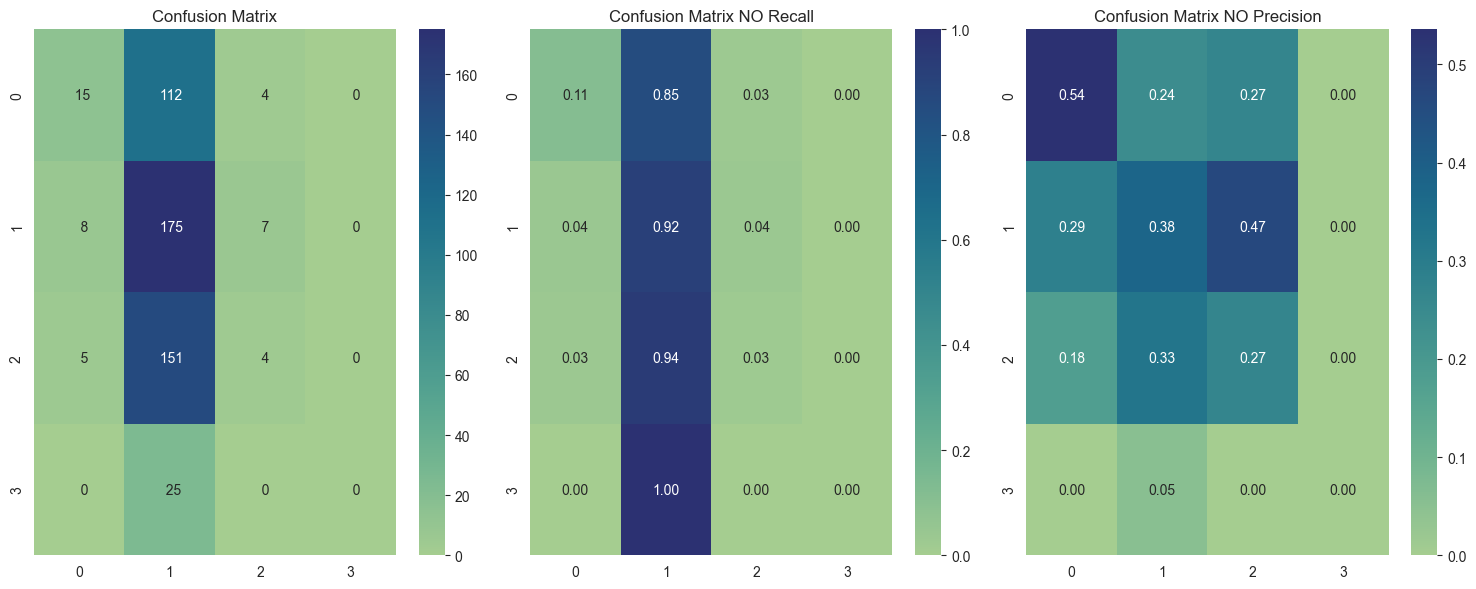

Confusion Matrix (KNN):
 [[ 15 112   4   0]
 [  8 175   7   0]
 [  5 151   4   0]
 [  0  25   0   0]]

Confusion Matrix (Normalized - Recall):
 [[0.11450382 0.85496183 0.03053435 0.        ]
 [0.04210526 0.92105263 0.03684211 0.        ]
 [0.03125    0.94375    0.025      0.        ]
 [0.         1.         0.         0.        ]]

Confusion Matrix (Normalized - Precision):
 [[0.53571429 0.24190065 0.26666667 0.        ]
 [0.28571429 0.37796976 0.46666667 0.        ]
 [0.17857143 0.32613391 0.26666667 0.        ]
 [0.         0.05399568 0.         0.        ]]


In [655]:
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)

conf_matrix_normalized_recall_sgd = confusion_matrix(y_test, y_pred_sgd, normalize='true')
conf_matrix_normalized_precision_sgd = confusion_matrix(y_test, y_pred_sgd, normalize='pred')


fig, axes = plt.subplots(1, 3, figsize=(15, 6))
sns.heatmap(conf_matrix_sgd, annot=True, fmt="4.0f", cmap="crest", ax=axes[0])
axes[0].set_title("Confusion Matrix")
#по recall
sns.heatmap(conf_matrix_normalized_recall_sgd, annot=True, fmt=".2f", cmap="crest",ax=axes[1])
axes[1].set_title("Confusion Matrix NO Recall")
#по precision
sns.heatmap(conf_matrix_normalized_precision_sgd, annot=True, fmt=".2f", cmap="crest",ax=axes[2])
axes[2].set_title("Confusion Matrix NO Precision")
plt.tight_layout()
plt.show()

print("Confusion Matrix (KNN):\n", conf_matrix_sgd)
print("\nConfusion Matrix (Normalized - Recall):\n", conf_matrix_normalized_recall_sgd)
print("\nConfusion Matrix (Normalized - Precision):\n", conf_matrix_normalized_precision_sgd)

# KNNClassifier

In [656]:
knn = KNeighborsClassifier()

params = {'n_neighbors': [3, 5, 7, 9], 'p': [1, 2]}

grid_search = GridSearchCV(knn, params, cv=5)
grid_search.fit(X_train_prepr, y_train)

# Вивід найкращих параметрів
print("Найкращі параметри:", grid_search.best_params_)

best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test_prepr)


Найкращі параметри: {'n_neighbors': 9, 'p': 1}


In [657]:
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("Weighted F1:", f1)

class_report = classification_report(y_test, y_pred_knn)
print("Classification Report:")
print(class_report)

Accuracy: 0.3458498023715415
Precision: 0.3273870382801045
Recall: 0.3458498023715415
Weighted F1: 0.32876029750022284
Classification Report:
              precision    recall  f1-score   support

         0.0       0.34      0.24      0.28       131
         1.0       0.35      0.51      0.41       190
         2.0       0.34      0.29      0.32       160
         3.0       0.00      0.00      0.00        25

    accuracy                           0.35       506
   macro avg       0.26      0.26      0.25       506
weighted avg       0.33      0.35      0.33       506


G:\Ilya\ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
G:\Ilya\ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
G:\Ilya\ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
G:\Ilya\ML\venv\Lib\site-packages\sklearn\metrics\_classification.p

Побудувати матриці невідповідностей (confusion matrix [API: 3]), проаналізувати матриці;

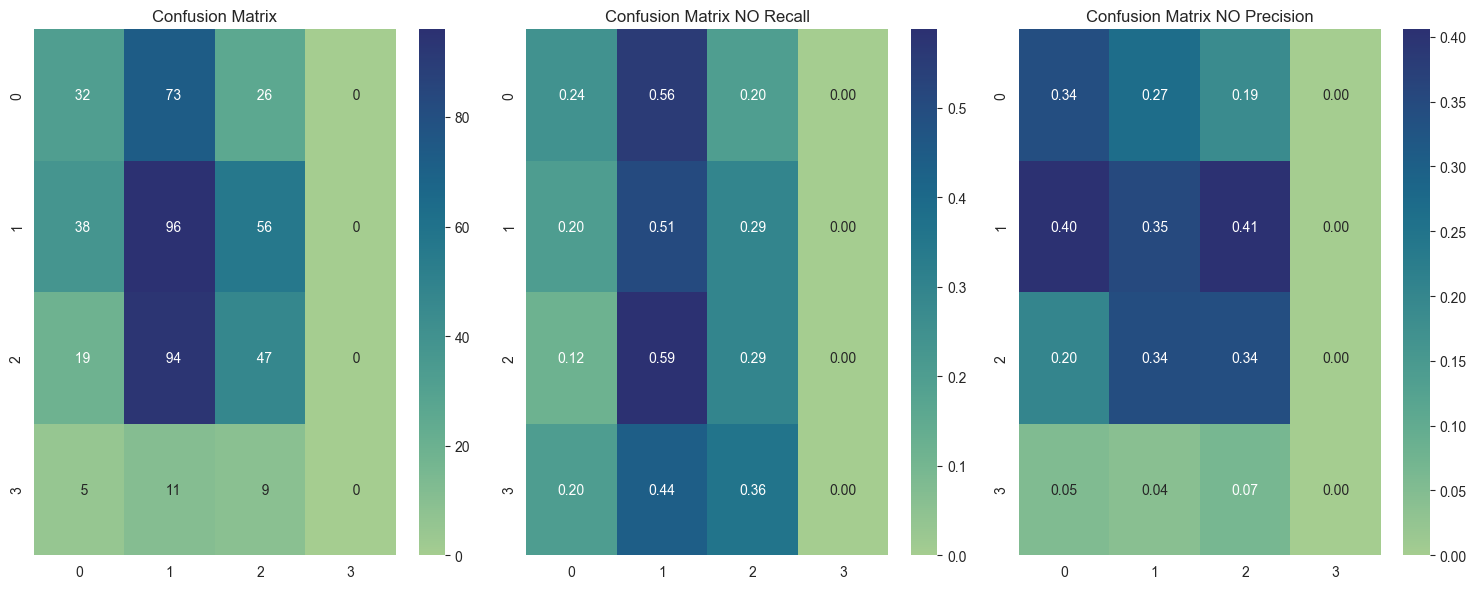

Confusion Matrix (KNN):
 [[32 73 26  0]
 [38 96 56  0]
 [19 94 47  0]
 [ 5 11  9  0]]

Confusion Matrix (Normalized - Recall):
 [[0.24427481 0.55725191 0.19847328 0.        ]
 [0.2        0.50526316 0.29473684 0.        ]
 [0.11875    0.5875     0.29375    0.        ]
 [0.2        0.44       0.36       0.        ]]

Confusion Matrix (Normalized - Precision):
 [[0.34042553 0.26642336 0.1884058  0.        ]
 [0.40425532 0.35036496 0.4057971  0.        ]
 [0.20212766 0.34306569 0.34057971 0.        ]
 [0.05319149 0.04014599 0.06521739 0.        ]]


In [658]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

conf_matrix_normalized_recall_knn = confusion_matrix(y_test, y_pred_knn, normalize='true')
conf_matrix_normalized_precision_knn = confusion_matrix(y_test, y_pred_knn, normalize='pred')


fig, axes = plt.subplots(1, 3, figsize=(15, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="4.0f", cmap="crest", ax=axes[0])
axes[0].set_title("Confusion Matrix")
#по recall
sns.heatmap(conf_matrix_normalized_recall_knn, annot=True, fmt=".2f", cmap="crest",ax=axes[1])
axes[1].set_title("Confusion Matrix NO Recall")
#по precision
sns.heatmap(conf_matrix_normalized_precision_knn, annot=True, fmt=".2f", cmap="crest",ax=axes[2])
axes[2].set_title("Confusion Matrix NO Precision")
plt.tight_layout()
plt.show()

print("Confusion Matrix (KNN):\n", conf_matrix_knn)
print("\nConfusion Matrix (Normalized - Recall):\n", conf_matrix_normalized_recall_knn)
print("\nConfusion Matrix (Normalized - Precision):\n", conf_matrix_normalized_precision_knn)

# DecisionTreeClassifier:

In [660]:
# Створення моделі DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Задання параметрів для тюнінгу
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Використання GridSearchCV для пошуку найкращих параметрів
grid_search_dtc = GridSearchCV(dtc, params, cv=5)
grid_search_dtc.fit(X_train_prepr, y_train)

# Вивід найкращих параметрів
print("Найкращі параметри:", grid_search_dtc.best_params_)


Найкращі параметри: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [661]:
# Прогнозування на тестових даних
y_pred_dtc = grid_search_dtc.predict(X_test_prepr)

# Обчислення метрик
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
precision_dtc = precision_score(y_test, y_pred_dtc, average='weighted', zero_division=0)
recall_dtc = recall_score(y_test, y_pred_dtc, average='weighted', zero_division=0)
f1_dtc = f1_score(y_test, y_pred_dtc, average='weighted', zero_division=0)

print("Accuracy:", accuracy_dtc)
print("Precision:", precision_dtc)
print("Recall:", recall_dtc)
print("F1 Score:", f1_dtc)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dtc))

Accuracy: 0.3695652173913043
Precision: 0.3703094336493546
Recall: 0.3695652173913043
F1 Score: 0.32511749300929704
Classification Report:
              precision    recall  f1-score   support

         0.0       0.45      0.07      0.12       131
         1.0       0.36      0.54      0.43       190
         2.0       0.38      0.47      0.42       160
         3.0       0.00      0.00      0.00        25

    accuracy                           0.37       506
   macro avg       0.30      0.27      0.24       506
weighted avg       0.37      0.37      0.33       506


G:\Ilya\ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
G:\Ilya\ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
G:\Ilya\ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


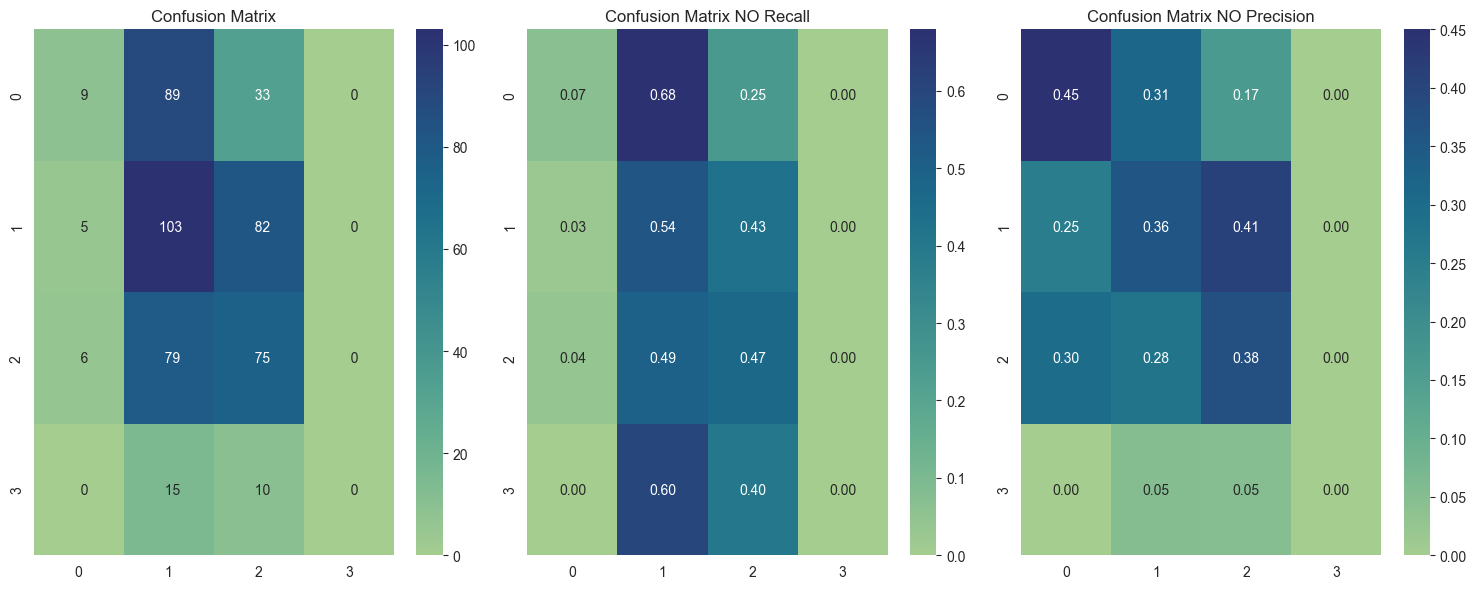

Confusion Matrix (KNN):
 [[  9  89  33   0]
 [  5 103  82   0]
 [  6  79  75   0]
 [  0  15  10   0]]

Confusion Matrix (Normalized - Recall):
 [[0.06870229 0.67938931 0.2519084  0.        ]
 [0.02631579 0.54210526 0.43157895 0.        ]
 [0.0375     0.49375    0.46875    0.        ]
 [0.         0.6        0.4        0.        ]]

Confusion Matrix (Normalized - Precision):
 [[0.45       0.31118881 0.165      0.        ]
 [0.25       0.36013986 0.41       0.        ]
 [0.3        0.27622378 0.375      0.        ]
 [0.         0.05244755 0.05       0.        ]]


In [662]:
conf_matrix_dtc = confusion_matrix(y_test, y_pred_dtc)

conf_matrix_normalized_recall_dtc = confusion_matrix(y_test, y_pred_dtc, normalize='true')
conf_matrix_normalized_precision_dtc = confusion_matrix(y_test, y_pred_dtc, normalize='pred')


fig, axes = plt.subplots(1, 3, figsize=(15, 6))
sns.heatmap(conf_matrix_dtc, annot=True, fmt="4.0f", cmap="crest", ax=axes[0])
axes[0].set_title("Confusion Matrix")
#по recall
sns.heatmap(conf_matrix_normalized_recall_dtc, annot=True, fmt=".2f", cmap="crest",ax=axes[1])
axes[1].set_title("Confusion Matrix NO Recall")
#по precision
sns.heatmap(conf_matrix_normalized_precision_dtc, annot=True, fmt=".2f", cmap="crest",ax=axes[2])
axes[2].set_title("Confusion Matrix NO Precision")
plt.tight_layout()
plt.show()

print("Confusion Matrix (KNN):\n", conf_matrix_dtc)
print("\nConfusion Matrix (Normalized - Recall):\n", conf_matrix_normalized_recall_dtc)
print("\nConfusion Matrix (Normalized - Precision):\n", conf_matrix_normalized_precision_dtc)

Для DecisionTreeClassifier відобразити та проаналізувати feature importance [API: ];

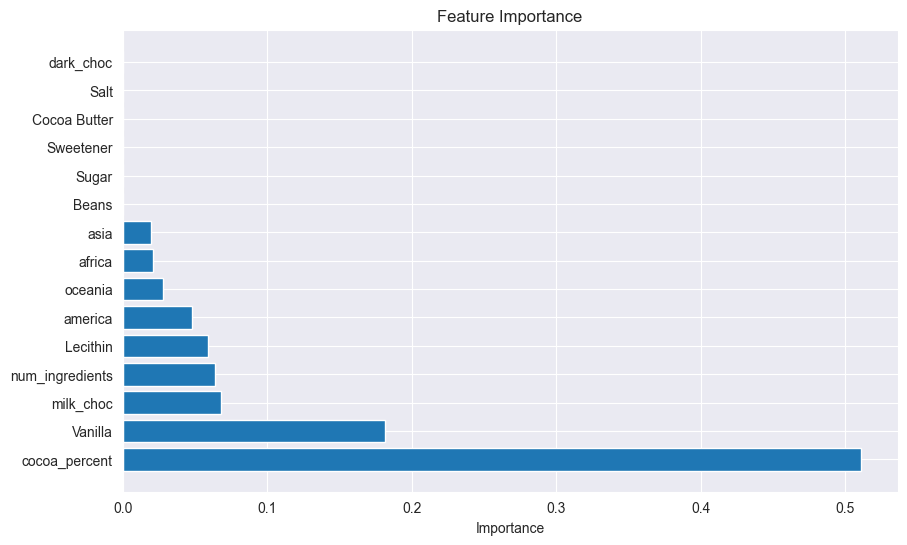

Feature Importance:
            Feature  Importance
0     cocoa_percent    0.510770
6           Vanilla    0.181381
14        milk_choc    0.067901
1   num_ingredients    0.063622
7          Lecithin    0.059417
11          america    0.047834
12          oceania    0.028031
10           africa    0.021357
9              asia    0.019687
2             Beans    0.000000
3             Sugar    0.000000
4         Sweetener    0.000000
5      Cocoa Butter    0.000000
8              Salt    0.000000
13        dark_choc    0.000000


In [663]:
# Отримання важливості ознак з навченої моделі
feature_importance = grid_search_dtc.best_estimator_.feature_importances_

# Створення DataFrame для відображення важливості ознак
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Відображення важливості ознак
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# Вивід важливості ознак у вигляді DataFrame
print("Feature Importance:")
print(feature_importance_df)

Вивести порівняльну таблицю для моделей по всім заданим метрикам, зробити відповідні висновки.

In [664]:
def calculate_metrics(y_test, y_preds):
    metrics = {}
    for name, y_pred in y_preds.items():
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        metrics[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }
    return pd.DataFrame(metrics).T

# Використання функції
y_preds = {
    'KNN': y_pred_knn,
    'SGDClassifier': y_pred_sgd,
    'DecisionTreeClassifier': y_pred_dtc
}
metrics_table = calculate_metrics(y_test, y_preds)
print(metrics_table)

                        Accuracy  Precision    Recall  F1 Score
KNN                     0.345850   0.327387  0.345850  0.328760
SGDClassifier           0.383399   0.364940  0.383399  0.264563
DecisionTreeClassifier  0.369565   0.370309  0.369565  0.325117
